In [1]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, get_linear_schedule_with_warmup, set_seed
from datasets import load_dataset, load_metric
import torch
import numpy as np


In [2]:
dataset = load_dataset("cnn_dailymail", "3.0.0")

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [5]:
max_article_length = max(len(article) for article in dataset['train']['article'])
max_article_length

15925

In [24]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")

In [25]:
tokenizer.model_max_length

512

In [56]:
samsum = load_dataset("samsum")
max = max(len(article) for article in samsum['train']['dialogue'])

avg = np.mean([len(article) for article in samsum['train']['dialogue']])
avg, max

Found cached dataset samsum (/home/is/kaifan-l/.cache/huggingface/datasets/samsum/samsum/0.0.0/f1d7c6b7353e6de335d444e424dc002ef70d1277109031327bc9cc6af5d3d46e)


  0%|          | 0/3 [00:00<?, ?it/s]

TypeError: 'int' object is not callable

Found cached dataset cnn_dailymail (/home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)


  0%|          | 0/3 [00:00<?, ?it/s]

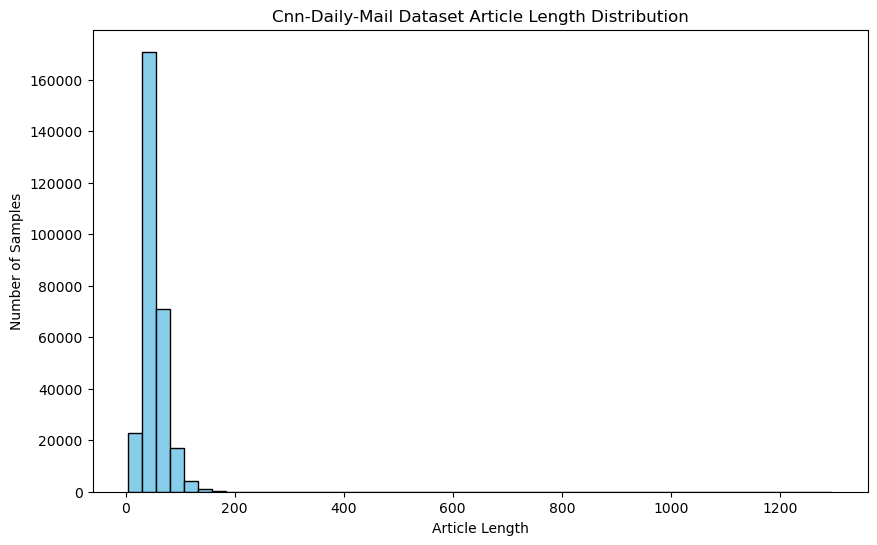

In [45]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# 加载Samsum数据集
dataset = load_dataset("cnn_dailymail", "3.0.0")

# 获取文章长度信息
article_lengths = [len(article.split()) for article in dataset["train"]["highlights"]]

# 绘制文章长度分布图
plt.figure(figsize=(10, 6))
plt.hist(article_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Article Length')
plt.ylabel('Number of Samples')
plt.title('Cnn-Daily-Mail Dataset Article Length Distribution')
plt.show()

In [54]:
dataset['train']['highlights'][0]
max_l = max(len(article.split()) for article in dataset['train']['highlights'])

TypeError: 'int' object is not callable

Found cached dataset billsum (/home/is/kaifan-l/.cache/huggingface/datasets/billsum/default/3.0.0/75cf1719d38d6553aa0e0714c393c74579b083ae6e164b2543684e3e92e0c4cc)


  0%|          | 0/3 [00:00<?, ?it/s]

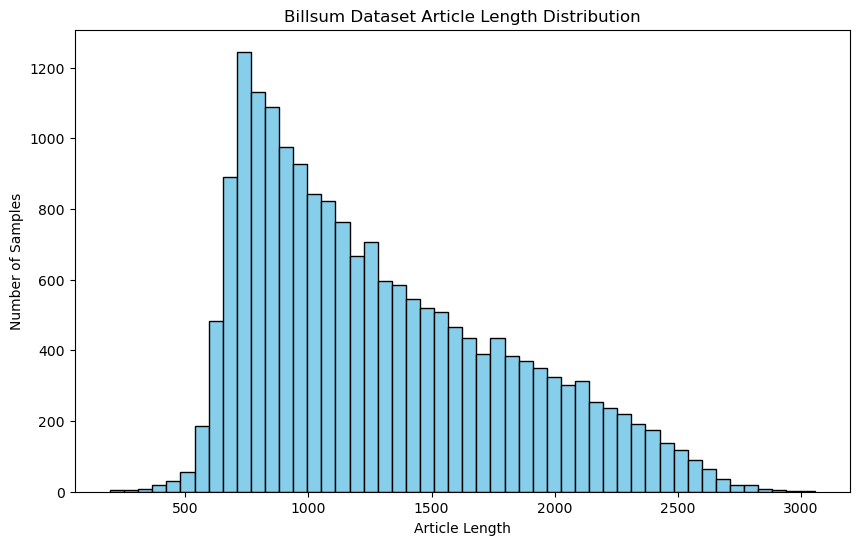

In [28]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# 加载Samsum数据集
dataset = load_dataset("billsum")

# 获取文章长度信息
article_lengths = [len(article.split()) for article in dataset["train"]["text"]]

# 绘制文章长度分布图
plt.figure(figsize=(10, 6))
plt.hist(article_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Article Length')
plt.ylabel('Number of Samples')
plt.title('Billsum Dataset Article Length Distribution')
plt.show()

Found cached dataset samsum (/home/is/kaifan-l/.cache/huggingface/datasets/samsum/samsum/0.0.0/f1d7c6b7353e6de335d444e424dc002ef70d1277109031327bc9cc6af5d3d46e)


  0%|          | 0/3 [00:00<?, ?it/s]

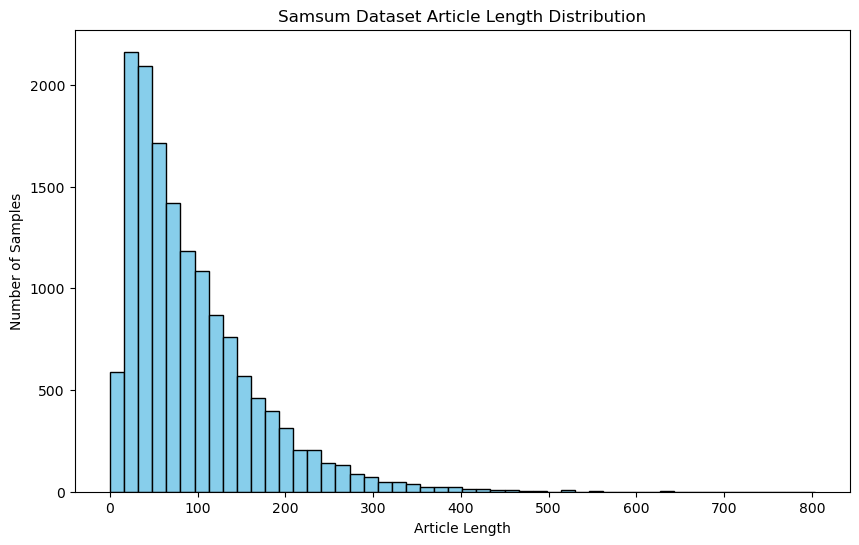

In [32]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# 加载Samsum数据集
dataset = load_dataset("samsum")

# 获取文章长度信息
article_lengths = [len(article.split()) for article in dataset["train"]["dialogue"]]

# 绘制文章长度分布图
plt.figure(figsize=(10, 6))
plt.hist(article_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Article Length')
plt.ylabel('Number of Samples')
plt.title('Samsum Dataset Article Length Distribution')
plt.show()


In [60]:
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

In [61]:
model.config


BartConfig {
  "_name_or_path": "facebook/bart-large-cnn",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "force_bos_token_to_be_generated": true,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "L

In [40]:
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")

In [41]:
tokenizer.max_model_input_sizes

{'facebook/bart-base': 1024,
 'facebook/bart-large': 1024,
 'facebook/bart-large-mnli': 1024,
 'facebook/bart-large-cnn': 1024,
 'facebook/bart-large-xsum': 1024,
 'yjernite/bart_eli5': 1024}

In [ ]:
bart_tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")
target_max_length = max([len(bart_tokenizer(x, truncation=True, padding='max_length')['input_ids']) for x in dataset['train']['highlights']])
print(target_max_length)

In [62]:
cnn_dataset = load_dataset("cnn_dailymail", "3.0.0")
cnn_dataset

Found cached dataset cnn_dailymail (/home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [5]:
import gc
import os
import sys
import threading

import numpy as np
import psutil
import torch

from accelerate import Accelerator
from datasets import load_dataset, load_metric
from torch.utils.data import DataLoader

from tqdm import tqdm

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, get_linear_schedule_with_warmup, set_seed

from peft import PrefixTuningConfig, TaskType, get_peft_model

In [2]:
cnn_dataset = load_dataset("cnn_dailymail", "3.0.0")

Found cached dataset cnn_dailymail (/home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
accelerator = Accelerator() # device_placement="cuda:0"
model_name_or_path = "facebook/bart-large"
dataset_name = "cnn_dailymail"
peft_config = PrefixTuningConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    num_virtual_tokens=20,
)
text_column = 'article'
label_column = 'highlights'
lr = 3e-3
num_epochs = 10
batch_size = 8
seed = 42
do_test = False
set_seed(seed)

In [6]:
# ================================== 2.2 数据预处理 ======================================
def preprocess_function(examples):
    inputs = examples[text_column]
    targets = examples[label_column]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True) # 这里暂时不padding
    targets = tokenizer(
        targets,
        max_length=target_max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt',
    )
    targets = targets['input_ids']
    targets[targets == tokenizer.pad_token_id] = -100
    model_inputs['labels'] = targets
    
    return model_inputs

In [8]:
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
target_max_length = max([len(tokenizer(x, truncation=True, padding='max_length')['input_ids']) for x in cnn_dataset['train'][label_column]])

In [9]:
with accelerator.main_process_first():
    cnn_dataset = cnn_dataset.map(
        preprocess_function,
        batched=True,
        num_proc=1,
        remove_columns=cnn_dataset["train"].column_names,
        load_from_cache_file=True,
        desc="Running tokenizer on dataset",
    )
accelerator.wait_for_everyone()

Running tokenizer on dataset:   0%|          | 0/287113 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/13368 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [23]:
train_dataset = cnn_dataset["train"]
eval_dataset = cnn_dataset["validation"]
test_dataset = cnn_dataset["test"]
train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 287113
})

In [14]:
def collate_fn(examples):
    return tokenizer.pad(examples, padding='longest', return_tensors='pt')

In [15]:
train_dataloader = DataLoader(
    train_dataset, 
    shuffle=True,
    collate_fn=collate_fn,
    batch_size=batch_size,
    pin_memory=True, # 将数据加载到固定的内存中，可以加速数据加载
)

In [21]:
for batch in train_dataloader:
    print(batch["labels"][0])
    print(batch["input_ids"][0])
    print(len(batch["input_ids"][0]))
    print(len(batch["labels"][0]))
    break

tensor([    0, 20439,   324,  ...,  -100,  -100,  -100])
tensor([  0, 250,  92,  ...,   1,   1,   1])
1024
1024


In [24]:
eval_dataloader = DataLoader(
    eval_dataset,
    collate_fn=collate_fn,
    batch_size=batch_size,
    pin_memory=True,
)
test_dataloader = DataLoader(
    test_dataset,
    collate_fn=collate_fn,
    batch_size=batch_size,
    pin_memory=True,
)


In [25]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_name_or_path)
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 491,520 || all params: 406,782,976 || trainable%: 0.12083101530777925


In [26]:
# optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

# scheduler
lr_scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * num_epochs,
)

# accelerator
model, train_dataloader, eval_dataloader, test_dataloader = accelerator.prepare(
    model, train_dataloader, eval_dataloader, test_dataloader
)
accelerator.print(model)

PeftModelForSeq2SeqLM(
  (base_model): BartForConditionalGeneration(
    (model): BartModel(
      (shared): Embedding(50265, 1024, padding_idx=1)
      (encoder): BartEncoder(
        (embed_tokens): Embedding(50265, 1024, padding_idx=1)
        (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
        (layers): ModuleList(
          (0-11): 12 x BartEncoderLayer(
            (self_attn): BartAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (fc2): Linear(in_features

In [29]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    print('safe')
    for step, batch in enumerate(tqdm(train_dataloader)):
        print('safe')
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.detach().float()
        accelerator.backward(loss) 
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    train_epoch_loss = total_loss / len(train_dataloader)
    train_ppl = torch.exp(train_epoch_loss)
    accelerator.print(f"{epoch=}: {train_ppl=} {train_epoch_loss=}")
        

safe


  0%|          | 0/35890 [00:00<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


: 

In [3]:
from datasets import train_test_split


ImportError: cannot import name 'train_test_split' from 'datasets' (/home/is/kaifan-l/miniconda3/envs/summarization/lib/python3.10/site-packages/datasets/__init__.py)

In [32]:
cnn_dataset = load_dataset("cnn_dailymail", "3.0.0")

Found cached dataset cnn_dailymail (/home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)


  0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
cnn_dataset = cnn_dataset.shuffle(seed=42)
cnn_dataset

Loading cached shuffled indices for dataset at /home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-380ef232430d96da.arrow
Loading cached shuffled indices for dataset at /home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-fe8ce4e4283768ec.arrow
Loading cached shuffled indices for dataset at /home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-914896ee6a47e4aa.arrow


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [43]:
test = cnn_dataset["train"][:100]
test[]

{'article': ["By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 March 2013 . | . UPDATED: . 08:07 EST, 2 March 2013 . Three members of the same family who died in a static caravan from carbon monoxide poisoning would have been unconscious 'within minutes', investigators said today. The bodies of married couple John and Audrey Cook were discovered alongside their daughter, Maureen, at the mobile home they shared on Tremarle Home Park in Camborne, west Cornwall. The inquests have now opened into the deaths last Saturday, with investigators saying the three died along with the family's pet dog, of carbon monoxide poisoning from a cooker. Tragic: The inquests have opened into the deaths of three members of the same family who were found in their static caravan last weekend. John and Audrey Cook are pictured . Awful: The family died following carbon monoxide poisoning at this caravan at the Tremarle Home Park in Camborne, Cornwall . It is also believed there was no working carbon monoxide detec

In [41]:
import datasets
train_dataset = cnn_dataset["train"]
train_dataset

new_set = train_dataset
len(new_set)

287113

In [27]:
cnn_dataset.filter(lambda x: len(x['article'].split()) < 1024)

Filter:   0%|          | 0/287113 [00:00<?, ? examples/s]

Filter:   0%|          | 0/13368 [00:00<?, ? examples/s]

Filter:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 241811
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11270
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 9612
    })
})

In [28]:
cnn_dataset.filter(lambda x: len(x['article'].split()) < 1024 and len(x['highlights'].split()) < 128)

Filter:   0%|          | 0/287113 [00:00<?, ? examples/s]

Filter:   0%|          | 0/13368 [00:00<?, ? examples/s]

Filter:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 241019
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11205
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 9571
    })
})

In [29]:
cnn_dataset['train']['article'][0]

'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details o

In [31]:
cnn_dataset = cnn_dataset.shuffle(seed=42)
cnn_dataset['train']['article'][0]

Loading cached shuffled indices for dataset at /home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-380ef232430d96da.arrow
Loading cached shuffled indices for dataset at /home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-fe8ce4e4283768ec.arrow
Loading cached shuffled indices for dataset at /home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-914896ee6a47e4aa.arrow


"By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 March 2013 . | . UPDATED: . 08:07 EST, 2 March 2013 . Three members of the same family who died in a static caravan from carbon monoxide poisoning would have been unconscious 'within minutes', investigators said today. The bodies of married couple John and Audrey Cook were discovered alongside their daughter, Maureen, at the mobile home they shared on Tremarle Home Park in Camborne, west Cornwall. The inquests have now opened into the deaths last Saturday, with investigators saying the three died along with the family's pet dog, of carbon monoxide poisoning from a cooker. Tragic: The inquests have opened into the deaths of three members of the same family who were found in their static caravan last weekend. John and Audrey Cook are pictured . Awful: The family died following carbon monoxide poisoning at this caravan at the Tremarle Home Park in Camborne, Cornwall . It is also believed there was no working carbon monoxide detector in the st

In [18]:
new_set.shuffle(seed=42)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 28712
})

In [48]:
(4+1) % 5 == 0

True

In [19]:
new_set[0]

{'article': "By . Alexandra Klausner . Eighteen dogs and two cats were rescued from a filthy Pacific Grove, California home on Wednesday. Animal rescuers from the SPCA for Monterey County had to force open the doors of the home because they were blocked by ' deep piles of feces and garbage,' reports KTVU. Upon entering the home, rescuers' eyes began to burn from the smell of ammonia and toxins from urine. Scroll down for video . Multiple dogs and cats were rescued from uninhabitable Pacific Grove house . The home was filled with piles of garbage and feces so high that SPCA officers had to force open the doors . Four of the animals were puppies who suffered from varying degrees of flea infestation and infection . Animal rescue officers needed to enter the filthy home wearing protective gear because the smell of feces and ammonia ridden urine was so strong . Many of the animals suffered from dental loss and infection because of the filthy conditions in the home . The house which is  cons

In [25]:
new_set.shuffle(seed=37)
new_set[0]

Loading cached shuffled indices for dataset at /home/is/kaifan-l/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-a731305153bff3b4.arrow


{'article': "By . Alexandra Klausner . Eighteen dogs and two cats were rescued from a filthy Pacific Grove, California home on Wednesday. Animal rescuers from the SPCA for Monterey County had to force open the doors of the home because they were blocked by ' deep piles of feces and garbage,' reports KTVU. Upon entering the home, rescuers' eyes began to burn from the smell of ammonia and toxins from urine. Scroll down for video . Multiple dogs and cats were rescued from uninhabitable Pacific Grove house . The home was filled with piles of garbage and feces so high that SPCA officers had to force open the doors . Four of the animals were puppies who suffered from varying degrees of flea infestation and infection . Animal rescue officers needed to enter the filthy home wearing protective gear because the smell of feces and ammonia ridden urine was so strong . Many of the animals suffered from dental loss and infection because of the filthy conditions in the home . The house which is  cons

In [45]:
import evaluate

evaluate.load("rouge")

EvaluationModule(name: "rouge", module_type: "metric", features: [{'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id=None)}, {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}], usage: """
Calculates average rouge scores for a list of hypotheses and references
Args:
    predictions: list of predictions to score. Each prediction
        should be a string with tokens separated by spaces.
    references: list of reference for each prediction. Each
        reference should be a string with tokens separated by spaces.
    rouge_types: A list of rouge types to calculate.
        Valid names:
        `"rouge{n}"` (e.g. `"rouge1"`, `"rouge2"`) where: {n} is the n-gram based scoring,
        `"rougeL"`: Longest common subsequence based scoring.
        `"rougeLsum"`: rougeLsum splits text using `"
"`.
        See details in https://github.com/huggingface/